In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
import itertools as it
import numpy as np
from numpy  import array 
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML


In [2]:
df=pd.read_csv('s3://gdc-emr/tsne3/part-00000-75249fd2-18bf-47cc-b2bf-a4d04290aeda-c000.csv')

In [3]:
tsne_data=[df['tsne_x'].tolist(),df['tsne_y'].tolist()]

In [4]:
tsne_array = array(tsne_data)
tsne_array=np.transpose(tsne_array)
tsne_array.shape

(10718, 2)

In [5]:
label_data=[df['sample_type_idx'].astype(int).tolist(),df['disease_type_idx'].astype(int).tolist(),df['diagonosis_idx'].astype(int).tolist()]

In [6]:
label_array = array(label_data)
label_array=np.transpose(label_array)
label_array.shape

(10718, 3)

In [ ]:
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
        )
)

In [ ]:
colors = it.cycle(["aquamarine", "crimson", "darkseagreen", "deeppink","wheat","violet","fuchsia","turquoise",\
                   "ivory", "honeydew", "rosybrown","red","lemonchiffon","darkorchid","mintcream","papayawhip",\
                   "beige","darkcyan","firebrick","deepskyblue","seashell","mediumpurple","goldenrod","lightcoral",\
                   "limegreen","cadetblue","darkmagenta","ghostwhite","gainsboro","paleturquoise","teal","peru",\
                  "maroon","olivedrab","springgreen","yellowgreen"])
classes = it.cycle(['Normal','Breast', 'Uterine Corpus', 'Head', 'Kidney Renal Clear', 'Lung Adenocarcinoma', 'Brain', 'Thyroid', 'Prostate', 'Ovarian', 'Lung Squamous', 'Skin', 'Colon', 'Stomach', 'Bladder', 'Liver', 'Cervical', 'Kidney Renal Papillary', 'Leukemia', 'Sarcoma', 'Esophageal', 'Pheochromocytoma', 'Pancreatic', 'Rectum', 'Testicular', 'Wilms', 'Thymoma', 'Mesothelioma', 'Adrenocortical', 'Uveal', 'Kidney Chromophobe', 'Uterine Carcinosarcoma', 'Lymphoid', 'Rhabdoid', 'Cholangiocarcinoma'])

classes_labels = ['Normal','Breast', 'Uterine Corpus', 'Head', 'Kidney Renal Clear', 'Lung Adenocarcinoma', 'Brain', 'Thyroid', 'Prostate', 'Ovarian', 'Lung Squamous', 'Skin', 'Colon', 'Stomach', 'Bladder', 'Liver', 'Cervical', 'Kidney Renal Papillary', 'Leukemia', 'Sarcoma', 'Esophageal', 'Pheochromocytoma', 'Pancreatic', 'Rectum', 'Testicular', 'Wilms', 'Thymoma', 'Mesothelioma', 'Adrenocortical', 'Uveal', 'Kidney Chromophobe', 'Uterine Carcinosarcoma', 'Lymphoid', 'Rhabdoid', 'Cholangiocarcinoma']

# x = tsne_data[:,0]
# y = tsne_data[:,1]
# for i in range(0,32):
#     idx=np.where(label_array[:,2]==i)
#     x_sel =[x[i] for i in idx]
#     y_sel =[y[i] for i in idx]

def scatter2D(X_train_2d,y_train,num_class):
    '''
    Function to genrate traces for 2D scatter plot
    Args: 2-feature X_train of dimension [?,2]
    Return: list of scatter plot trace objects
    '''
    data=[]
    for label in range(0,num_class):
        filtered_idx = np.where(y_train==label)
        trace = go.Scatter(
            x=X_train_2d[filtered_idx,0],
            y=X_train_2d[filtered_idx,1],
            mode='markers',
            marker=dict(
                size=5,
                line=dict(
                    color=next(colors),
                    width=0.1
                    ),
                opacity=0.5
                ),
            name=next(classes)
            )
        data.append(trace)
    return data

In [ ]:
tsne2_traces = scatter2D(tsne_array,label_array[:,0],1)
fig4 = go.Figure(data=tsne2_traces, layout=layout)
py.iplot(fig4, filename='tSNE2D_Scatter')

In [7]:

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

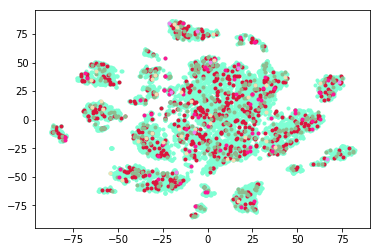

In [8]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
colors = it.cycle(["aquamarine", "crimson", "darkseagreen", "deeppink","wheat","violet","fuchsia","turquoise",\
                   "ivory", "honeydew", "rosybrown","red","lemonchiffon","darkorchid","mintcream","papayawhip",\
                   "beige","darkcyan","firebrick","deepskyblue","seashell","mediumpurple","goldenrod","lightcoral",\
                   "limegreen","cadetblue","darkmagenta","ghostwhite","gainsboro","paleturquoise","teal","peru",\
                  "maroon","olivedrab","springgreen","yellowgreen"])
restart = it.islice(colors, 0, None)
# classes = it.cycle(['Normal','Breast', 'Uterine Corpus', 'Head', 'Kidney Renal Clear', 'Lung Adenocarcinoma', 'Brain', 'Thyroid', 'Prostate', 'Ovarian', 'Lung Squamous', 'Skin', 'Colon', 'Stomach', 'Bladder', 'Liver', 'Cervical', 'Kidney Renal Papillary', 'Leukemia', 'Sarcoma', 'Esophageal', 'Pheochromocytoma', 'Pancreatic', 'Rectum', 'Testicular', 'Wilms', 'Thymoma', 'Mesothelioma', 'Adrenocortical', 'Uveal', 'Kidney Chromophobe', 'Uterine Carcinosarcoma', 'Lymphoid', 'Rhabdoid', 'Cholangiocarcinoma'])

# classes_labels = ['Normal','Breast', 'Uterine Corpus', 'Head', 'Kidney Renal Clear', 'Lung Adenocarcinoma', 'Brain', 'Thyroid', 'Prostate', 'Ovarian', 'Lung Squamous', 'Skin', 'Colon', 'Stomach', 'Bladder', 'Liver', 'Cervical', 'Kidney Renal Papillary', 'Leukemia', 'Sarcoma', 'Esophageal', 'Pheochromocytoma', 'Pancreatic', 'Rectum', 'Testicular', 'Wilms', 'Thymoma', 'Mesothelioma', 'Adrenocortical', 'Uveal', 'Kidney Chromophobe', 'Uterine Carcinosarcoma', 'Lymphoid', 'Rhabdoid', 'Cholangiocarcinoma']

x = tsne_array[:,0]
y = tsne_array[:,1]
for i in range(0,6):
    idx=np.where(label_array[:,0]==i)
    x_sel =[x[i] for i in idx]
    y_sel =[y[i] for i in idx]
    ax.scatter(x_sel, y_sel, color = next(colors),marker='.')
plt.show()

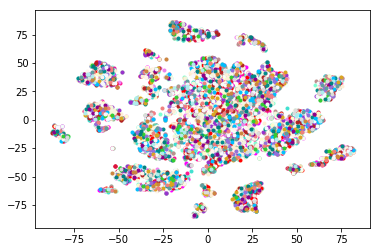

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
colors = it.cycle(["aquamarine", "crimson", "darkseagreen", "deeppink","wheat","violet","fuchsia","turquoise",\
                   "ivory", "honeydew", "rosybrown","red","lemonchiffon","darkorchid","mintcream","papayawhip",\
                   "beige","darkcyan","firebrick","deepskyblue","seashell","mediumpurple","goldenrod","lightcoral",\
                   "limegreen","cadetblue","darkmagenta","ghostwhite","gainsboro","paleturquoise","teal","peru",\
                  "maroon","olivedrab","springgreen","yellowgreen"])
restart = it.islice(colors, 0, None)
# classes = it.cycle(['Normal','Breast', 'Uterine Corpus', 'Head', 'Kidney Renal Clear', 'Lung Adenocarcinoma', 'Brain', 'Thyroid', 'Prostate', 'Ovarian', 'Lung Squamous', 'Skin', 'Colon', 'Stomach', 'Bladder', 'Liver', 'Cervical', 'Kidney Renal Papillary', 'Leukemia', 'Sarcoma', 'Esophageal', 'Pheochromocytoma', 'Pancreatic', 'Rectum', 'Testicular', 'Wilms', 'Thymoma', 'Mesothelioma', 'Adrenocortical', 'Uveal', 'Kidney Chromophobe', 'Uterine Carcinosarcoma', 'Lymphoid', 'Rhabdoid', 'Cholangiocarcinoma'])

# classes_labels = ['Normal','Breast', 'Uterine Corpus', 'Head', 'Kidney Renal Clear', 'Lung Adenocarcinoma', 'Brain', 'Thyroid', 'Prostate', 'Ovarian', 'Lung Squamous', 'Skin', 'Colon', 'Stomach', 'Bladder', 'Liver', 'Cervical', 'Kidney Renal Papillary', 'Leukemia', 'Sarcoma', 'Esophageal', 'Pheochromocytoma', 'Pancreatic', 'Rectum', 'Testicular', 'Wilms', 'Thymoma', 'Mesothelioma', 'Adrenocortical', 'Uveal', 'Kidney Chromophobe', 'Uterine Carcinosarcoma', 'Lymphoid', 'Rhabdoid', 'Cholangiocarcinoma']

x = tsne_array[:,0]
y = tsne_array[:,1]
for i in range(0,32):
    idx=np.where(label_array[:,1]==i)
    x_sel =[x[i] for i in idx]
    y_sel =[y[i] for i in idx]
    ax.scatter(x_sel, y_sel, color = next(colors),marker='.')
plt.show()

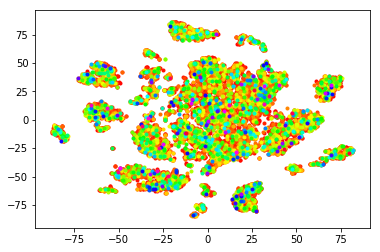

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cmap = get_cmap(136)
restart = it.islice(colors, 0, None)
# classes = it.cycle(['Normal','Breast', 'Uterine Corpus', 'Head', 'Kidney Renal Clear', 'Lung Adenocarcinoma', 'Brain', 'Thyroid', 'Prostate', 'Ovarian', 'Lung Squamous', 'Skin', 'Colon', 'Stomach', 'Bladder', 'Liver', 'Cervical', 'Kidney Renal Papillary', 'Leukemia', 'Sarcoma', 'Esophageal', 'Pheochromocytoma', 'Pancreatic', 'Rectum', 'Testicular', 'Wilms', 'Thymoma', 'Mesothelioma', 'Adrenocortical', 'Uveal', 'Kidney Chromophobe', 'Uterine Carcinosarcoma', 'Lymphoid', 'Rhabdoid', 'Cholangiocarcinoma'])

# classes_labels = ['Normal','Breast', 'Uterine Corpus', 'Head', 'Kidney Renal Clear', 'Lung Adenocarcinoma', 'Brain', 'Thyroid', 'Prostate', 'Ovarian', 'Lung Squamous', 'Skin', 'Colon', 'Stomach', 'Bladder', 'Liver', 'Cervical', 'Kidney Renal Papillary', 'Leukemia', 'Sarcoma', 'Esophageal', 'Pheochromocytoma', 'Pancreatic', 'Rectum', 'Testicular', 'Wilms', 'Thymoma', 'Mesothelioma', 'Adrenocortical', 'Uveal', 'Kidney Chromophobe', 'Uterine Carcinosarcoma', 'Lymphoid', 'Rhabdoid', 'Cholangiocarcinoma']

x = tsne_array[:,0]
y = tsne_array[:,1]
for i in range(0,135):
    idx=np.where(label_array[:,2]==i)
    x_sel =[x[i] for i in idx]
    y_sel =[y[i] for i in idx]
    ax.scatter(x_sel, y_sel, color = cmap(i),marker='.')
plt.show()

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [ ]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [ ]:
HTML(anim.to_html5_video())